In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [238]:
df=pd.read_excel('dataset.xlsx')

In [240]:
df.drop(0,axis=0,inplace=True)


In [191]:
df

,Unique ID,Age,Gender,BCLOT,A/G RAT,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
1,1.0,73.0,M,358,1.15,0.4,0.8,1.2,3.4,7.3,3.9,25,26,32,58
2,2.0,22.0,M,172,1.85,0.42,0.68,1.1,2.42,6.9,4.48,20,27,30,61
3,3.0,36.0,F,166,1.48,0.11,0.2,0.31,2.82,7,4.18,16,28,36,97
4,4.0,52.0,F,213,1.26,0.3,0.3,0.6,3.5,7.9,4.4,16,20,28,89
5,5.0,35.0,F,187,1.24,0.11,0.17,0.28,3.48,7.8,4.32,39,20,18,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331562,331564.0,60.0,F,142,1.62,0.17,0.36,0.53,2.6,6.8,4.2,20,21,22,69
331563,331565.0,27.0,M,166,1.36,0.34,0,0.34,3.9,9.2,5.3,164,37,39,123
331564,331566.0,42.0,F,219,1.41,0.1,0.24,0.34,2.94,7.1,4.16,25,40,60,65
331565,331567.0,74.0,M,148,2.63,0.28,0.34,0.62,1.68,6.1,4.42,55,27,24,45


In [22]:
df.index

RangeIndex(start=1, stop=331567, step=1)

(array([ 3719.,  8053., 33409., 64617., 68804., 66259., 53715., 26216.,
         6303.,   470.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. ]),
 <BarContainer object of 10 artists>)

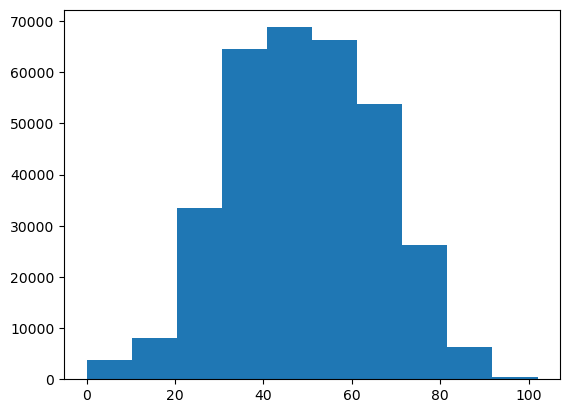

In [28]:
ages=df['Age'].to_numpy()
plt.hist(ages)

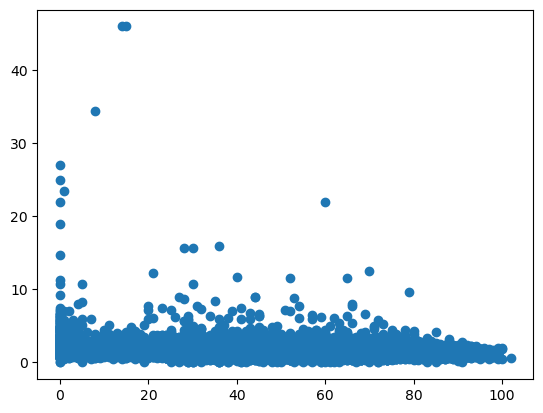

In [30]:
ag=df['A/G RAT'].to_numpy()
plt.scatter(ages,ag)

In [75]:
df.isnull().sum()

Age        0
BCLOT      0
A/G RAT    0
DBIL       0
IBIL       0
TBIL       0
TGLO       0
TREP       0
ALB        0
GGT        0
SGOT       0
SGPT       0
ALKPO4     0
dtype: int64

In [241]:
df.drop(269653,axis=0,inplace=True)

In [242]:
n=len(df.index)
print(n)

327154


In [36]:
df.iloc[0]['Age']

73.0

In [17]:
def elbow(dpath,k_limit):
    df=pd.read_excel(dpath)
    df.drop(0,axis=0,inplace=True)
    df.drop(['Gender'],axis=1,inplace=True)
    #df.drop(269653,axis=0,inplace=True)
    df.drop(['Age','DBIL','IBIL','TREP','A/G RAT'],axis=1,inplace=True)
    scaled_df = StandardScaler().fit_transform(df)
    kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
    sse = []
    for k in range(1, k_limit):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_df)
        sse.append(kmeans.inertia_)

    #visualize results
    plt.plot(range(1, k_limit), sse)
    plt.xticks(range(1, k_limit))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

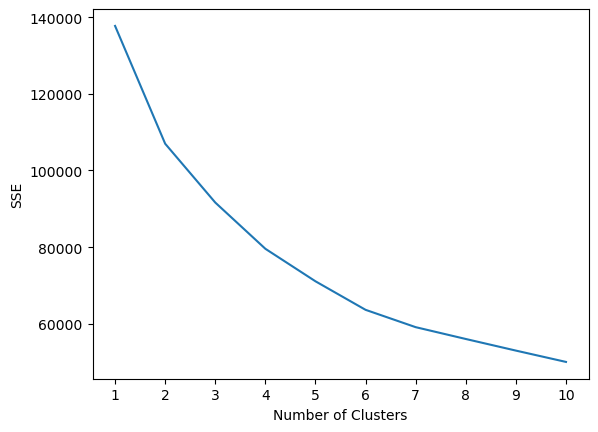

In [19]:
elbow('abnormals.xlsx',11)